# Hierarchical Clustering

In this lab, you will see how to use **hierarchical clustering**.

## Imports

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, cut_tree
import seaborn as sns

In [77]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

In [4]:
# !pip install scikit-network

In [5]:
from sknetwork.data import karate_club, load_netset
from sknetwork.embedding import Spectral
from sknetwork.utils import get_degrees
from sknetwork.visualization import svg_graph, svg_dendrogram

## Iris dataset

We start with the Iris dataset.

In [55]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = list(iris.target_names)

In [56]:
# hierarchical clustering
Z = linkage(X, method='ward')

In [57]:
Z.shape

(149, 4)

In [58]:
Z[:,[0,1,3]].astype(int)

array([[101, 142,   2],
       [  7,  39,   2],
       [  0,  17,   2],
       [  9,  34,   2],
       [128, 132,   2],
       [ 10,  48,   2],
       [  4,  37,   2],
       [ 19,  21,   2],
       [ 29,  30,   2],
       [ 57,  93,   2],
       [ 80,  81,   2],
       [116, 137,   2],
       [  8,  38,   2],
       [  3,  47,   2],
       [ 27,  28,   2],
       [ 82,  92,   2],
       [ 95,  96,   2],
       [127, 138,   2],
       [  1,  45,   2],
       [ 63,  91,   2],
       [ 65,  75,   2],
       [ 40, 152,   3],
       [123, 126,   2],
       [ 49, 151,   3],
       [112, 139,   2],
       [ 94,  99,   2],
       [ 12, 168,   3],
       [ 88, 166,   3],
       [ 66,  84,   2],
       [ 23,  26,   2],
       [ 53,  89,   2],
       [ 74,  97,   2],
       [ 25, 153,   3],
       [ 46, 157,   3],
       [  2, 163,   3],
       [110, 147,   2],
       [120, 143,   2],
       [136, 148,   2],
       [ 78, 169,   3],
       [ 69, 160,   3],
       [ 54,  58,   2],
       [140, 144

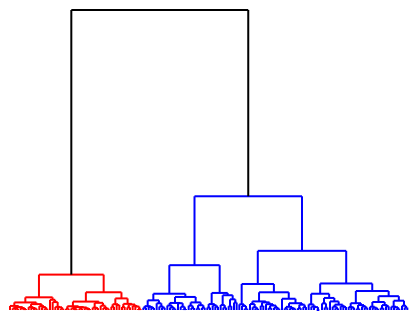

In [36]:
SVG(svg_dendrogram(Z))

## To do

* What are the two first flowers merged? Compare their features.
* Give the first 2 clusters. Show the contingency matrix and give the ARI / AMI scores.
* Give the first 3 clusters. Show the contingency matrix, give the ARI / AMI scores and compare with K-Means.
* Test other linkages.

In [37]:
# Assuming Z is the linkage matrix from hierarchical clustering
print(f"First two flowers merged: {Z[0]}")

# Compare their features
flower1_index, flower2_index = int(Z[0, 0]), int(Z[0, 1])
print(f"Features of the first flower merged: {X[flower1_index]}")
print(f"Features of the second flower merged: {X[flower2_index]}")


First two flowers merged: [101. 142.   0.   2.]
Features of the first flower merged: [5.8 2.7 5.1 1.9]
Features of the second flower merged: [5.8 2.7 5.1 1.9]


In [43]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score

# Cut the dendrogram to get 2 clusters
clusters_2 = fcluster(Z, t=2, criterion='maxclust')
#clusters_2 = cut_tree(Z, n_clusters=2)

# Contingency matrix
cont_matrix_2 = contingency_matrix(y, clusters_2)
print("Contingency Matrix for 2 clusters:\n", cont_matrix_2)

# ARI and AMI scores
ARI_2 = adjusted_rand_score(y, clusters_2)
AMI_2 = adjusted_mutual_info_score(y, clusters_2)
print(f"ARI for 2 clusters: {ARI_2}")
print(f"AMI for 2 clusters: {AMI_2}")


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Contingency Matrix for 2 clusters:
 [[50  0]
 [ 0 50]
 [ 0 50]]
ARI for 2 clusters: 0.5681159420289855
AMI for 2 clusters: 0.7315847607219572


In [75]:
# Cut the dendrogram to get 3 clusters
clusters_3 = fcluster(Z, t=3, criterion='maxclust')

# Contingency matrix for 3 clusters
cont_matrix_3 = contingency_matrix(y, clusters_3)
print("Contingency Matrix for 3 clusters:\n", cont_matrix_3)

# ARI and AMI scores for 3 clusters
ARI_3 = adjusted_rand_score(y, clusters_3)
AMI_3 = adjusted_mutual_info_score(y, clusters_3)
print(f"ARI for 3 clusters: {ARI_3}")
print(f"AMI for 3 clusters: {AMI_3}\n")

# Comparison with K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)
cont_matrix_4 = contingency_matrix(y, kmeans_labels)
print("Contingency Matrix for 3 clusters Kmeans:\n", cont_matrix_4)


ARI_kmeans = adjusted_rand_score(y, kmeans_labels)
AMI_kmeans = adjusted_mutual_info_score(y, kmeans_labels)
print(f"ARI for K-Means: {ARI_kmeans}")
print(f"AMI for K-Means: {AMI_kmeans}")


Contingency Matrix for 3 clusters:
 [[50  0  0]
 [ 0  1 49]
 [ 0 35 15]]
ARI for 3 clusters: 0.7311985567707746
AMI for 3 clusters: 0.767166961571311

Contingency Matrix for 3 clusters KMM:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
ARI for K-Means: 0.7302382722834697
AMI for K-Means: 0.7551191675800483


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
# Example using 'complete' linkage
Z_complete = linkage(X, method='average')

# Assuming Z is the linkage matrix from hierarchical clustering
print(f"First two flowers merged: {Z[0]}")

# Compare their features
flower1_index, flower2_index = int(Z[0, 0]), int(Z[0, 1])
print(f"Features of the first flower merged: {X[flower1_index]}")
print(f"Features of the second flower merged: {X[flower2_index]}")

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score

# Cut the dendrogram to get 2 clusters
clusters_2 = fcluster(Z, t=2, criterion='maxclust')

# Contingency matrix
cont_matrix_2 = contingency_matrix(y, clusters_2)
print("Contingency Matrix for 2 clusters:\n", cont_matrix_2)

# ARI and AMI scores
ARI_2 = adjusted_rand_score(y, clusters_2)
AMI_2 = adjusted_mutual_info_score(y, clusters_2)
print(f"ARI for 2 clusters: {ARI_2}")
print(f"AMI for 2 clusters: {AMI_2}")


# Cut the dendrogram to get 3 clusters
clusters_3 = fcluster(Z, t=3, criterion='maxclust')

# Contingency matrix for 3 clusters
cont_matrix_3 = confusion_matrix(y, clusters_3)
print("Contingency Matrix for 3 clusters:\n", cont_matrix_3)

# ARI and AMI scores for 3 clusters
ARI_3 = adjusted_rand_score(y, clusters_3)
AMI_3 = adjusted_mutual_info_score(y, clusters_3)
print(f"ARI for 3 clusters: {ARI_3}")
print(f"AMI for 3 clusters: {AMI_3}")

# Comparison with K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)

ARI_kmeans = adjusted_rand_score(y, kmeans_labels)
AMI_kmeans = adjusted_mutual_info_score(y, kmeans_labels)
print(f"ARI for K-Means: {ARI_kmeans}")
print(f"AMI for K-Means: {AMI_kmeans}")


First two flowers merged: [101. 142.   0.   2.]
Features of the first flower merged: [5.8 2.7 5.1 1.9]
Features of the second flower merged: [5.8 2.7 5.1 1.9]
Contingency Matrix for 2 clusters:
 [[ 0 50  0]
 [ 0  0 50]
 [ 0  0 50]]
ARI for 2 clusters: 0.5681159420289855
AMI for 2 clusters: 0.7315847607219572
Contingency Matrix for 3 clusters:
 [[ 0 50  0  0]
 [ 0  0  1 49]
 [ 0  0 35 15]
 [ 0  0  0  0]]
ARI for 3 clusters: 0.7311985567707746
AMI for 3 clusters: 0.767166961571311
ARI for K-Means: 0.7302382722834697
AMI for K-Means: 0.7551191675800483


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## To do

* Complete the function ``get_n_clusters`` below, that returns relevant cuts of the dendrogram.
* Select the 2 best clusterings of the Iris dataset.
* Compare with $k$-means.

In [62]:
def get_n_clusters(Z):
    '''Return the list of numbers of clusters in decreasing order of height gaps. 
    
    Parameters
    ----------
    Z : np.ndarray
        Dendrogram
    Returns
    -------
    n_clusters : np.ndarray
        Numbers of clusters.
    '''
    # to be modified
    # Calculate gaps in height between successive merges
    heights = Z[:, 2]  # Heights of merges are in the third column of Z
    height_diffs = np.diff(heights)  # Differences in heights between successive merges
    
    # Sort the height differences in descending order and get their indices
    sorted_diff_indices = np.argsort(height_diffs)[::-1]
    
    # Convert indices to numbers of clusters; larger gaps imply fewer clusters after the merge
    n_clusters = len(Z) + 1 - sorted_diff_indices
    
    return n_clusters

In [63]:
#Z = linkage(X, method='ward')  # Assuming you've already performed hierarchical clustering
n_clusters_suggestions = get_n_clusters(Z)
print(n_clusters_suggestions)

[  3   4   5   6   7   9  15  10  16 150  13  17  26  12  19  22  24   8
  20  23  42  29  25 145  18  21 130  35  31  37  53  74  58 114  43  28
 123  68  41  57  51  61 108  36  34  99  50  95  64  48  89 125  54  30
  59 119  94  40  49 118 116  69  65  63 100  77 107  47 102  73  72  52
  55  46  90  86  85 101  84  82  80  76  32  45  56  33  11  44  70  81
  79  78  62  92  39  14  93  38  27  60 124  71 122 106  91 113 146  96
 121 109 149 117 126 103 129  66 133 110  67 139 105 128 138  87  97  88
  83 127 132 147 111 104 144 148 112 143 142  75 120 141 140 137 115 135
 134 131  98 136]


In [78]:
silhouette_scores = {}
for n_clusters in n_clusters_suggestions:
    if n_clusters == 1:  # Silhouette score is not defined for a single cluster
        continue
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[n_clusters] = score

best_two_cluster_numbers = sorted(silhouette_scores, key=silhouette_scores.get, reverse=True)[:2]
print(f"Best two cluster numbers based on silhouette score: {best_two_cluster_numbers}")

Best two cluster numbers based on silhouette score: [3, 4]


In [82]:
# Initialize dictionaries to store scores
ami_scores = {}
ari_scores = {}

# Evaluate each clustering suggestion
for n_clusters in n_clusters_suggestions:
    if n_clusters < 2:  # Skip if only one cluster, since ARI and AMI are not meaningful in this case
        continue
    # Generate cluster labels from hierarchical clustering
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    # Calculate AMI and ARI
    ami = adjusted_mutual_info_score(y, cluster_labels)
    ari = adjusted_rand_score(y, cluster_labels)
    ami_scores[n_clusters] = ami
    ari_scores[n_clusters] = ari

# Select the best two cluster numbers based on AMI and ARI scores
best_two_ami = sorted(ami_scores, key=ami_scores.get, reverse=True)[:2]
best_two_ari = sorted(ari_scores, key=ari_scores.get, reverse=True)[:2]

## K-Means

In [79]:
from sklearn.cluster import KMeans

kmeans_results = {}
for n_clusters in best_two_cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    kmeans_labels = kmeans.labels_
    score = silhouette_score(X, kmeans_labels)
    kmeans_results[n_clusters] = score

print(f"Silhouette scores for k-means: {kmeans_results}")


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette scores for k-means: {3: 0.5528190123564095, 4: 0.49805050499728737}


In [80]:
# Assuming you have silhouette_scores for hierarchical clusterings and kmeans_results
print("Silhouette scores for selected hierarchical clusterings:", {n: silhouette_scores[n] for n in best_two_cluster_numbers})
print("Silhouette scores for k-means:", kmeans_results)


Silhouette scores for selected hierarchical clusterings: {3: 0.5543236611296419, 4: 0.4889670857554692}
Silhouette scores for k-means: {3: 0.5528190123564095, 4: 0.49805050499728737}


In [84]:
# For k-means comparison
kmeans_ami_scores = {}
kmeans_ari_scores = {}

# Union of best clusters from AMI and ARI evaluations
best_clusters = set(best_two_ami + best_two_ari)

for n_clusters in best_clusters:
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    kmeans_labels = kmeans.predict(X)
    # Calculate AMI and ARI
    ami_kmeans = adjusted_mutual_info_score(y, kmeans_labels)
    ari_kmeans = adjusted_rand_score(y, kmeans_labels)
    kmeans_ami_scores[n_clusters] = ami_kmeans
    kmeans_ari_scores[n_clusters] = ari_kmeans

# Compare scores
print("AMI scores for hierarchical clustering:", {n: ami_scores[n] for n in best_clusters})
print("ARI scores for hierarchical clustering:", {n: ari_scores[n] for n in best_clusters})
print("AMI scores for k-means:", kmeans_ami_scores)
print("ARI scores for k-means:", kmeans_ari_scores)


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AMI scores for hierarchical clustering: {3: 0.767166961571311, 4: 0.7052873669107861}
ARI scores for hierarchical clustering: {3: 0.7311985567707746, 4: 0.660216985695529}
AMI scores for k-means: {3: 0.7551191675800483, 4: 0.717208194405102}
ARI scores for k-means: {3: 0.7302382722834697, 4: 0.6498176853819967}


## Karate Club

We now consider the [Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) graph. The Ward method is applied to the spectral embedding of the graph.

In [71]:
graph = karate_club(metadata=True)

In [72]:
adjacency = graph.adjacency
labels = graph.labels
position = graph.position

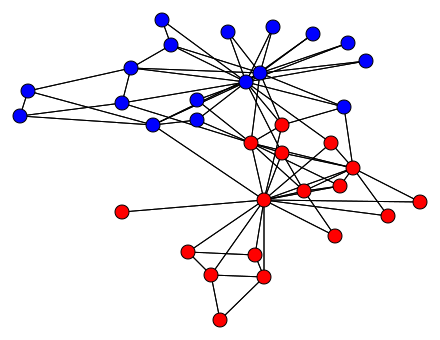

In [73]:
SVG(svg_graph(adjacency, position, labels=labels))

## To do

* Apply hierarchical clustering to the spectral embedding in dimension 3.
* Display the dendrogram.
* Display the best clustering.
* Compute the ARI / AMI scores.
* Compare with k-means (with the same number of clusters).

In [85]:
spectral = Spectral(n_components=3)
X = spectral.fit_transform(adjacency)

In [86]:
Z = linkage(X, method='ward')

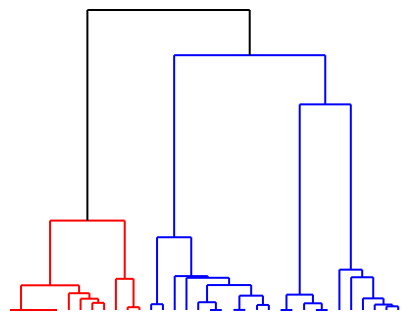

In [87]:
SVG(svg_dendrogram(Z))

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/

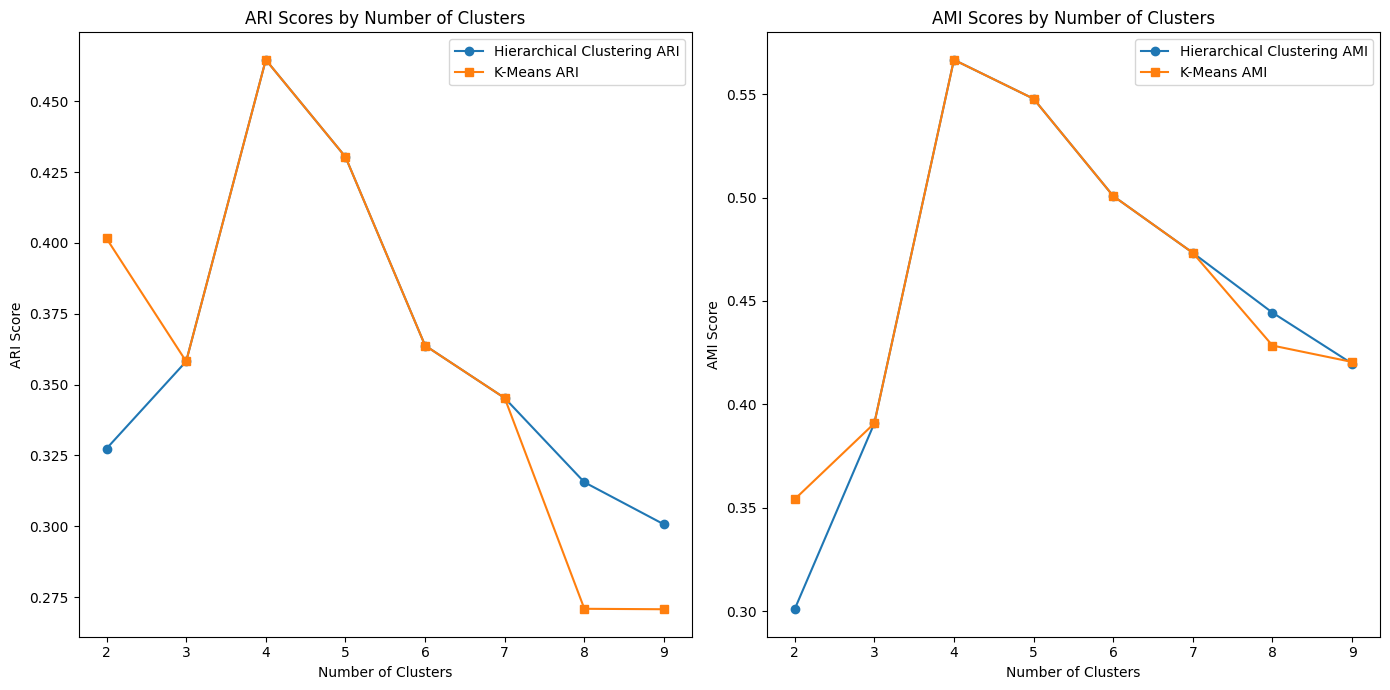

In [97]:
# Assuming X_reduced is already computed using SpectralEmbedding
# Assuming y_true contains the true labels for the Karate Club dataset

# Define the range of clusters to evaluate
cluster_range = range(2, 10)

# Initialize lists to store scores
ari_scores_hc = []
ami_scores_hc = []
ari_scores_km = []
ami_scores_km = []

for n_clusters in cluster_range:
    # Hierarchical Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    y_pred_hc = hc.fit_predict(X)
    ari_scores_hc.append(adjusted_rand_score(labels, y_pred_hc))
    ami_scores_hc.append(adjusted_mutual_info_score(labels, y_pred_hc))
    
    # K-Means Clustering
    km = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred_km = km.fit_predict(X)
    ari_scores_km.append(adjusted_rand_score(labels, y_pred_km))
    ami_scores_km.append(adjusted_mutual_info_score(labels, y_pred_km))

# Plotting the scores
plt.figure(figsize=(14, 7))

# ARI Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, ari_scores_hc, label='Hierarchical Clustering ARI', marker='o')
plt.plot(cluster_range, ari_scores_km, label='K-Means ARI', marker='s')
plt.title('ARI Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('ARI Score')
plt.legend()

# AMI Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, ami_scores_hc, label='Hierarchical Clustering AMI', marker='o')
plt.plot(cluster_range, ami_scores_km, label='K-Means AMI', marker='s')
plt.title('AMI Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.legend()

plt.tight_layout()
plt.show()


## Wikipedia

Finally, we consider a small subset of Wikipedia called [Wikipedia for Schools](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools). Each article is encoded by the words used in the summary of this article.

In [100]:
dataset = load_netset('wikischools')

Unpacking archive...
Parsing files...
Done.


In [101]:
adjacency = dataset.adjacency
features = dataset.biadjacency
names = dataset.names
words = dataset.names_col
labels = dataset.labels
names_labels = dataset.names_labels

In [102]:
i = 100
names[i]

'United Nations'

In [103]:
# label
names_labels[labels[i]]

'Politics'

In [104]:
# words
words[features[i].indices]

array(['memori', 'trust', 'held', 'sinc', 'wide', 'statu', 'politician',
       'met', 'hagu', 'princip', 'prize', 'new', 'assembl', 'aim',
       'draft', 'member', 'effect', 'main', 'april', 'financ',
       'peacekeep', 'import', 'voluntari', 'gain', 'council', 'social',
       'court', 'antónio', 'nairobi', 'coloni', 'maintain', 'deliv',
       'achiev', 'complex', 'relat', 'world', 'contribut', 'union',
       'octob', 'monitor', 'justic', 'centr', 'far', 'decolon', 'earli',
       'confer', 'former', 'aid', 'peac', 'spend', 'sustain', 'power',
       'leagu', 'primarili', 'geneva', 'opera', 'significantli', 'econom',
       'comment', 'diplomat', 'role', 'alli', 'lightli', 'san', 'budget',
       'forc', 'francisco', 'agenc', 'undertak', 'membership',
       'headquart', 'particip', 'militari', 'decad', 'prevent', 'task',
       'complic', 'januari', 'arm', 'six', 'charter', 'troop', 'ii',
       'adopt', 'among', 'intern', 'observ', 'oper', 'bias', 'develop',
       'respect', '

In [105]:
# number of incoming links
in_degrees = get_degrees(adjacency, transpose=True)
in_degrees[i]

318

In [106]:
spectral = Spectral(n_components=20)
X = spectral.fit_transform(features)

## To do

* Apply hierarchical clustering to the spectral embedding in dimension 20.
* Select the best clustering and compare with the ground-truth in terms of ARI / AMI.
* Select the clustering with 20 clusters and list the top 5 articles of each cluster (in terms of number of incoming links).

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

# Assuming X is the spectral embedding in dimension 20
spectral = Spectral(n_components=20)
X = spectral.fit_transform(features)

# Apply hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram for visual inspection to select the best cluster number
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Assuming the best number of clusters is determined visually or otherwise
n_clusters = 20  # Example cluster number
hclust = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hclust = hclust.fit_predict(X)

# Compare with ground-truth
ARI = adjusted_rand_score(labels, y_hclust)
AMI = adjusted_mutual_info_score(labels, y_hclust)
print(f"Adjusted Rand Index: {ARI}")
print(f"Adjusted Mutual Information: {AMI}")

# Analyzing top 5 articles in each cluster by number of incoming links
clusters = {i: [] for i in range(n_clusters)}
for i, cluster in enumerate(y_hclust):
    clusters[cluster].append((names[i], in_degrees[i]))

for cluster, articles in clusters.items():
    sorted_articles = sorted(articles, key=lambda x: x[1], reverse=True)[:5]
    print(f"Cluster {cluster}:")
    for article, in_degree in sorted_articles:
        print(f" - {article} with {in_degree} incoming links")
